In [29]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

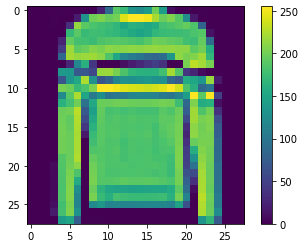

In [32]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0

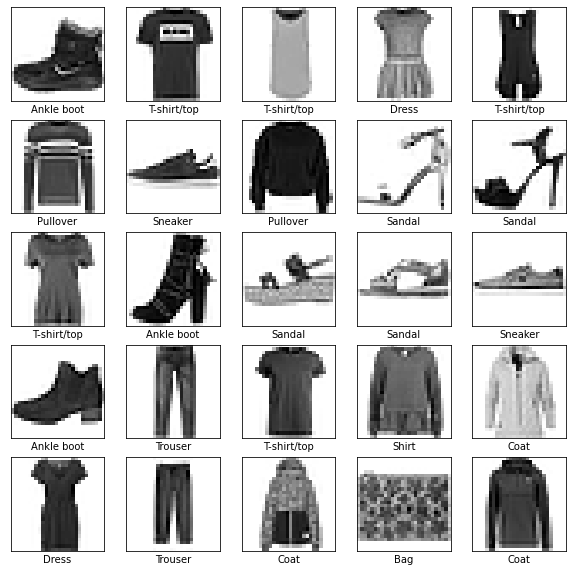

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:

model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 651us/step - loss: 0.4946 - accuracy: 0.8249
Epoch 2/15
1875/1875 [==============================] - 1s 658us/step - loss: 0.3711 - accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 1s 679us/step - loss: 0.3344 - accuracy: 0.8780
Epoch 4/15
1875/1875 [==============================] - 1s 639us/step - loss: 0.3109 - accuracy: 0.8861
Epoch 5/15
1875/1875 [==============================] - 1s 646us/step - loss: 0.2954 - accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 1s 635us/step - loss: 0.2792 - accuracy: 0.8976
Epoch 7/15
1875/1875 [==============================] - 1s 641us/step - loss: 0.2661 - accuracy: 0.9008
Epoch 8/15
1875/1875 [==============================] - 1s 649us/step - loss: 0.2560 - accuracy: 0.9047
Epoch 9/15
1875/1875 [==============================] - 1s 648us/step - loss: 0.2482 - accuracy: 0.9082
Epoch 10/15
1875/1875 [==============================] - 1s 649u

In [38]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

In [40]:
np.argmax(predictions[0])

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
        true_label, img = true_label[i], img[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions_array)
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

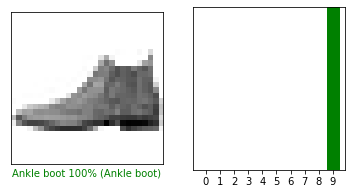

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

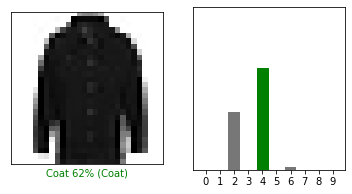

In [52]:
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

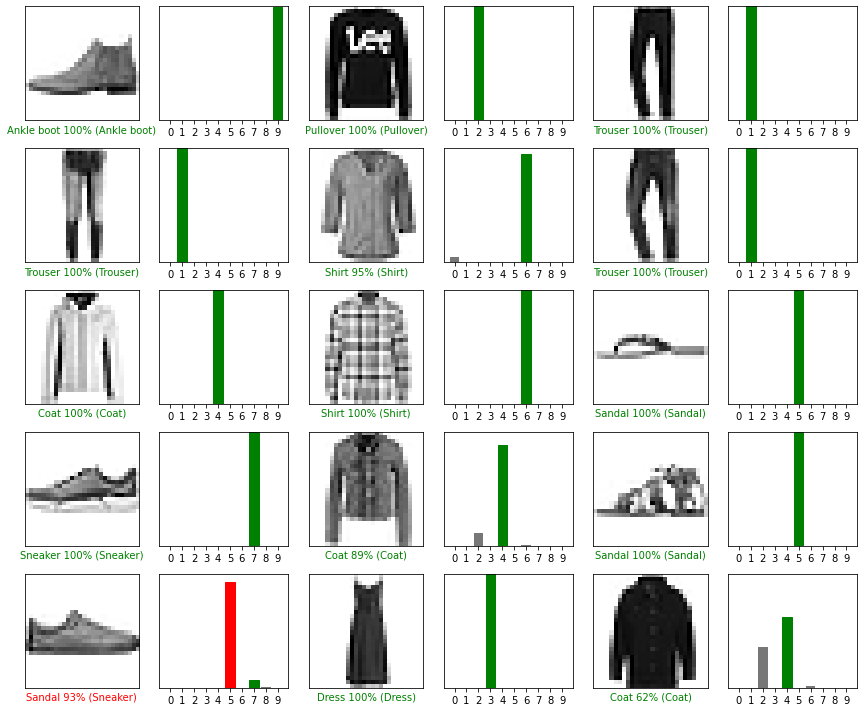

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [63]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.44421419e-05 1.04828886e-13 9.99932170e-01 5.58371200e-14
  4.77175781e-05 3.79668993e-16 5.75650029e-06 1.22722211e-18
  4.08926885e-11 1.02272086e-13]]


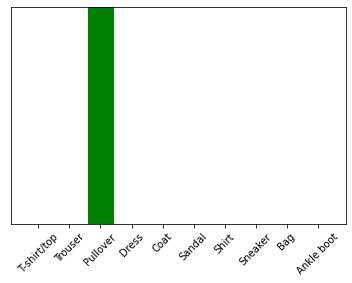

In [64]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [65]:
np.argmax(predictions_single[0])

2